# Clustering

In [1]:
#Begin with standard imports
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('default')

# K-Means Clustering Algorithm

In [2]:
!pip install kneed

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1d9d5972f90>
C:\Users\AA\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=3>
  return process_handler(cmd, _system_body)
C:\Users\AA\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=4>
  return process_handler(cmd, _system_body)
C:\Users\AA\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)


In [3]:
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
features, true_labels = make_blobs( n_samples=300,
    centers=4,
    cluster_std=0.60,
    random_state=0)

In [5]:
features[:5]

array([[ 0.83685684,  2.13635938],
       [-1.4136581 ,  7.40962324],
       [ 1.15521298,  5.09961887],
       [-1.01861632,  7.81491465],
       [ 1.27135141,  1.89254207]])

In [6]:
true_labels[:5]

array([1, 3, 0, 3, 1])

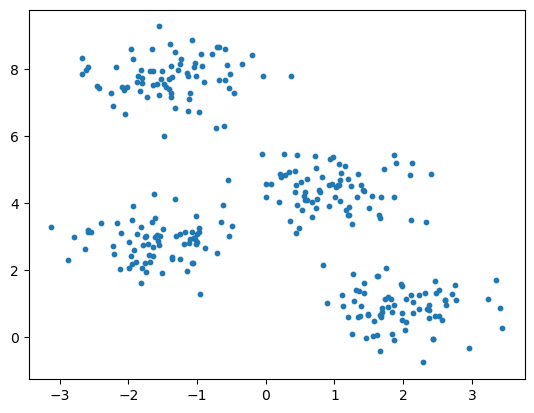

In [7]:
plt.scatter(features[:,0],features[:,1],s=10)

# Feature Scaling

The process of transforming numerical features to use the same scale is known as feature scaling. It’s an important data preprocessing step for most distance-based machine learning algorithms because it can have a significant impact on the performance of your algorithm.

In [8]:
scaler = StandardScaler()
x=scaler.fit_transform(features)
x[:5]

array([[ 0.51625508, -0.70722723],
       [-0.86166376,  1.3290677 ],
       [ 0.71117444,  0.43704896],
       [-0.61979222,  1.48557283],
       [ 0.78228231, -0.8013784 ]])

# Building a K-Means Model

In [9]:
kmeans = KMeans(init='random',n_clusters=4,n_init=10,max_iter=300,random_state=0)

# Training the model

Now that the k-means class is ready, the next step is to fit it to the data in scaled_features. This will perform ten runs of the k-means algorithm on your data with a maximum of 300 iterations per run:

In [10]:
kmeans.fit(x)

C:\Users\AA\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\AA\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\AA\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\AA\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\AA\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable

KMeans(init='random', n_clusters=4, n_init=10, random_state=0)

# Assessing the attributes from training

In [11]:
#The lowest Sum of Squared Errors value
kmeans.inertia_

56.02477057509952

In [12]:
#Final location of centroids
kmeans.cluster_centers_

array([[-0.96619422, -0.43906093],
       [-0.83691948,  1.46193015],
       [ 1.21774671, -1.19712077],
       [ 0.58536699,  0.17425154]])

In [13]:
#the number of iteration required to converge
kmeans.n_iter_

8

Finally, the cluster assignments are stored as a one-dimensional NumPy array in kmeans.labels_. Here’s a look at the first five predicted labels:

In [14]:
kmeans.labels_[:5]

array([2, 1, 3, 1, 2])

Ordering of cluster labels is dependent on the initialization. So it's normal to see that clusters with true_labels as 3 labeled with 2 here. This doesn’t affect clustering evaluation metrics.

In [15]:
y_kmeans = kmeans.predict(x)
y_kmeans[:5]

array([2, 1, 3, 1, 2])

# Visualizing results

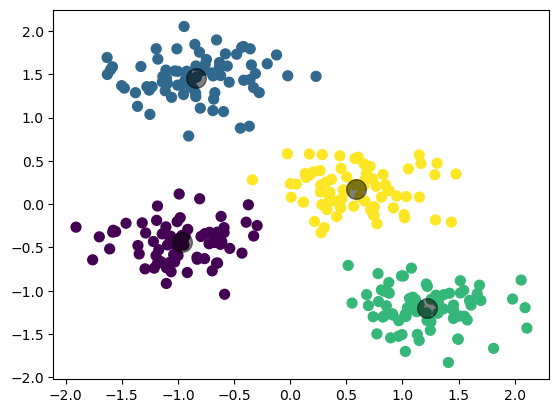

In [16]:
plt.scatter(x[:,0],x[:,1],c=y_kmeans,s=50,cmap='viridis')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)

# Choosing the Appropriate Number of clusers

Two methods to evaluate the appropriate number of cluster:
1. The elbow method 
2. The silhouette coefficient

In [17]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [19]:
kmeans_kwargs = {
    "init":"random",
    "n_init":10,
    "max_iter":300,
    "random_state":42,
}
#a list to hold SSE(sum of squared error)values for each k

sse =[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)


C:\Users\AA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\AA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\AA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\AA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

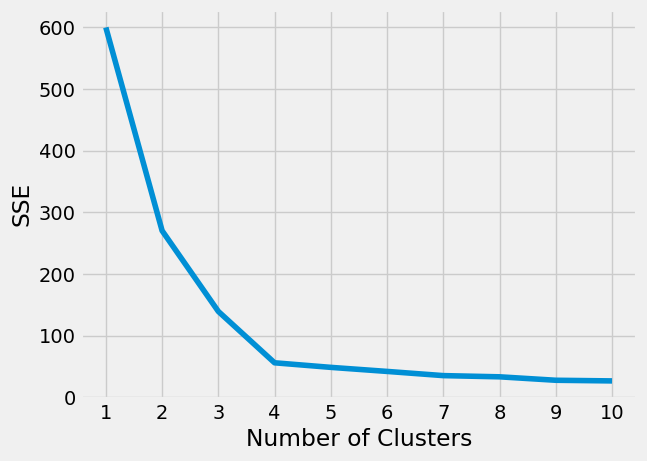

In [20]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

When you plot SSE as a function of the number of clusters, notice that SSE continues to decrease as you increase k. As more centroids are added, the distance from each point to its closest centroid will decrease.

There’s a sweet spot where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters. In this example, the elbow is located at x=4.

Determining the elbow point in the SSE curve isn’t always straightforward. If you’re having trouble choosing the elbow point of the curve, then you could use a Python package, kneed, to identify the elbow point programmatically:

In [21]:
kl = KneeLocator(range(1,11),sse,curve="convex",direction="decreasing")

In [22]:
kl.elbow

4

The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

1. How close the data point is to other points in the cluster
2. How far away the data point is from points in other clusters

Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In [23]:
from sklearn.metrics import silhouette_score
#a list that holds the silhouette coefficient for each k
silhouette_coefficient = []

#notice you start at clusters 2 for silhouette coefficient
for k in range(2,11):
    kmeans=KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficient.append(score)

C:\Users\AA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\AA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\AA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\AA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

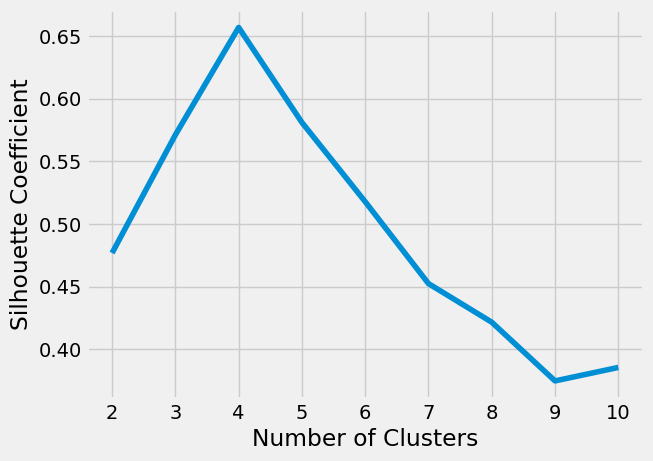

In [24]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,11),silhouette_coefficient)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()